In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# re(regular expression) is a module for string matching
# and searching for a text at a specific pattern or directory.
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Printing the list of English stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Preprocessing

In [8]:
# Load the dataset
df = pd.read_csv('data.csv')

# print the first 5 rows of the dataset
print(df.head())

                                                URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singe

In [9]:
df.shape

(4009, 4)

In [10]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [11]:
df = df.rename(columns={'Headline': 'title'})
df.columns

Index(['URLs', 'title', 'Body', 'Label'], dtype='object')

In [12]:
# 1--> fake
# 0--> real
df['Label']

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

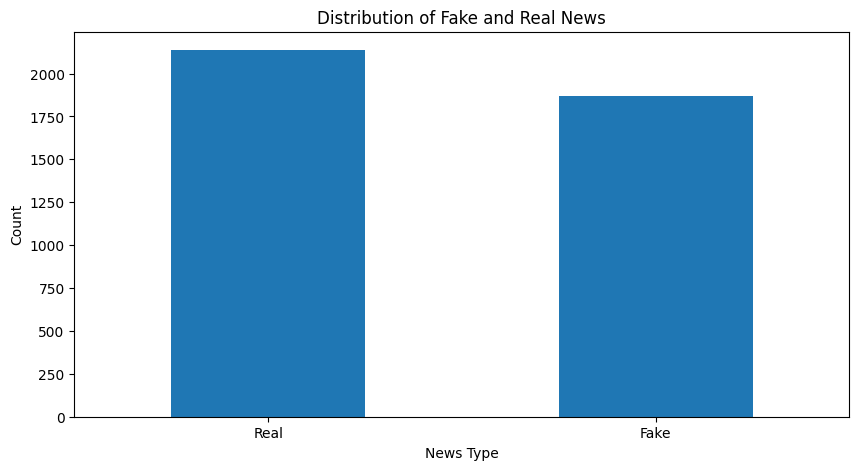

In [15]:
plt.figure(figsize=(10, 5))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'], rotation=0)
plt.show()